In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive
from matplotlib import pyplot as plt
import scipy as scipy
import plotly.express as px
from matplotlib.backends.backend_pdf import PdfPages
import math
from scipy import stats

In [ ]:
drive.mount('/content/drive')

w_wine = pd.read_csv('drive/My Drive/ICA/winequality-white.csv', sep = ';')
r_wine = pd.read_csv('drive/My Drive/ICA/winequality-red.csv', sep = ';')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#1. Considerações iniciais sobre as variáveis

In [ ]:
w_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
395,6.8,0.27,0.12,1.3,0.040,87.0,168.0,0.9920,3.18,0.41,10.0,5
396,8.2,0.28,0.42,1.8,0.031,30.0,93.0,0.9917,3.09,0.39,11.4,5
397,6.3,0.20,0.40,1.5,0.037,35.0,107.0,0.9917,3.46,0.50,11.4,6
398,5.9,0.26,0.27,18.2,0.048,52.0,168.0,0.9993,3.35,0.44,9.4,5


In [ ]:
r_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##OBS.:
### Remover dióxido de enxofre livre e açúcar residual
### Decidir se removemos o ácool ou a densidade

##Teste de remoção de skew com transformação Box-Cox

In [ ]:
w_wine_skew =  w_wine.drop(columns = ["residual sugar"])

In [ ]:
w_wine_skew

,fixed acidity,volatile acidity,citric acid,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,-1.417058,0.36,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,-1.294668,0.34,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,-1.374638,0.40,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,-1.606292,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,-1.606292,0.32,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,-1.715275,0.29,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,-1.220454,0.36,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,-1.555711,0.19,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,-1.333881,0.30,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [ ]:
for col in w_wine_skew.columns:
  if w_wine_skew[col].skew() >= 1 and w_wine_skew[col].min() > 0:
    w_wine_skew[col] = stats.boxcox(w_wine_skew[col])[0]

In [ ]:
w_wine_skew.skew()

fixed acidity           0.647751
volatile acidity       -0.005003
citric acid             1.281920
chlorides              -0.159151
free sulfur dioxide     0.030907
total sulfur dioxide    0.390710
density                 0.977773
pH                      0.457783
sulphates               0.977194
alcohol                 0.487342
quality                 0.155796
dtype: float64

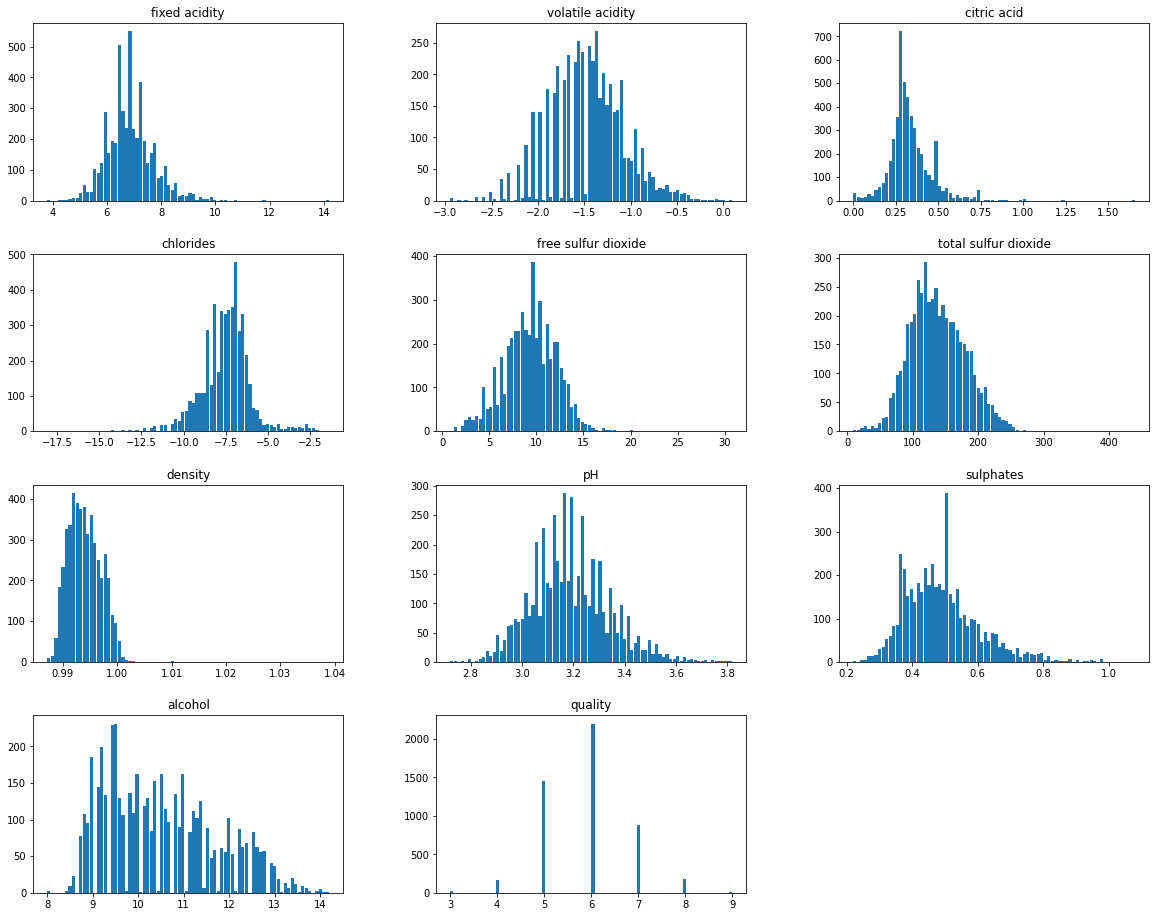

In [ ]:
w_wine_skew.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
#plt.savefig('inconditional_white.png')
plt.show()

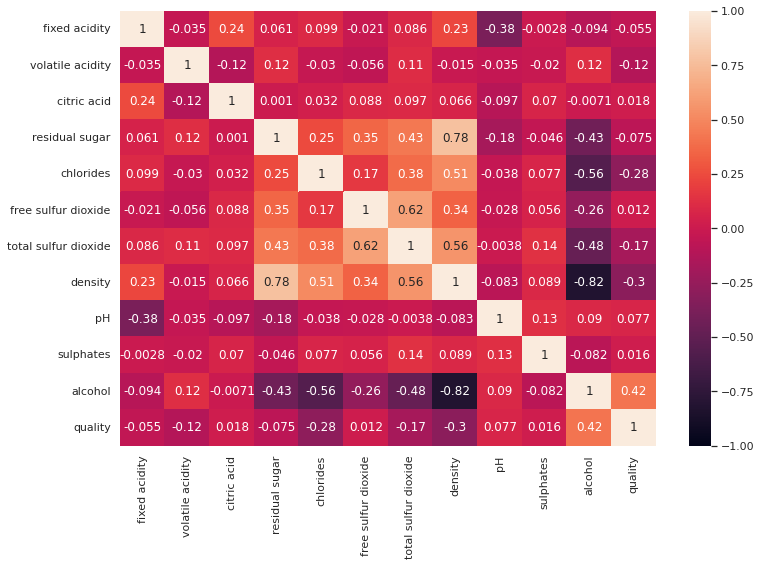

In [ ]:
# r_wine_cleaned.drop(columns=["free sulfur dioxide", "fixed acidity", "volatile acidity"], inplace = True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(w_wine_skew.corr(), annot=True, vmin=-1, vmax=1)

# Regressao - Vinho Branco

**Importando bibliotecas**

In [ ]:
import sklearn.model_selection as skms
import sklearn.linear_model as sklm
import sklearn as sk

**Definindo o x e y**

In [ ]:
df = pd.DataFrame.from_dict(w_wine)
w_wine_train = df.copy(deep=False)
del w_wine_train['quality']
y = pd.concat([w_wine['quality']], axis = 1)

**Fazendo a regressão linear**

In [ ]:
x_treino, x_teste, y_treino, y_teste = skms.train_test_split(w_wine_train, y, test_size=0.25, random_state=0)
lm = sklm.LinearRegression()
lm.fit(x_treino, y_treino)
f = lm.predict(w_wine_train)
y_pred = lm.predict(x_teste)

In [ ]:
print(lm.coef_)
print(lm.intercept_)

[[ 1.15953365e-01 -1.81594265e+00 -1.66810488e-02  9.65149311e-02
  -5.13583573e-01  4.74413246e-03 -2.17957734e-04 -1.98333673e+02
   8.79948572e-01  6.27189921e-01  1.31644131e-01]]
[197.53109105]


**Algumas predições**

In [ ]:
'''fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, ttl sulfur dioxide, density, pH, sulphates, alchool '''
lm.predict([[7.0, 0.27, 0.36, 20.7, 0.045, 45.0, 170.0, 1.00100, 3.00, 0.45, 8.8]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[5.54617845]])

# Cross-validation - Vinho Branco

**5-fold Cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
kf = KFold(n_splits = 5, random_state = None)
media = cross_val_score(lm, w_wine_train, y, cv=kf, scoring = 'neg_mean_absolute_error')
print(-media)

[0.65151403 0.60287265 0.58660583 0.57607985 0.55191584]


**10-fold Cross validation**

In [ ]:
kf = KFold(n_splits = 10, random_state = None)
media = cross_val_score(lm, w_wine_train, y, cv=kf, scoring = 'neg_mean_absolute_error')
print(-media)

[0.62478467 0.66670697 0.64454685 0.55338978 0.59760309 0.57626037
 0.59696247 0.55230794 0.57142168 0.51042795]


#1.2 Remoção de outliers (vinho tinto)

In [ ]:
remover = []
for i in r_wine:
  if(i!='quality'):
    remover.extend(outliers(r_wine, i))
r_wine_cleaned = remove(r_wine, remover)
r_wine_cleaned.shape

(1194, 12)

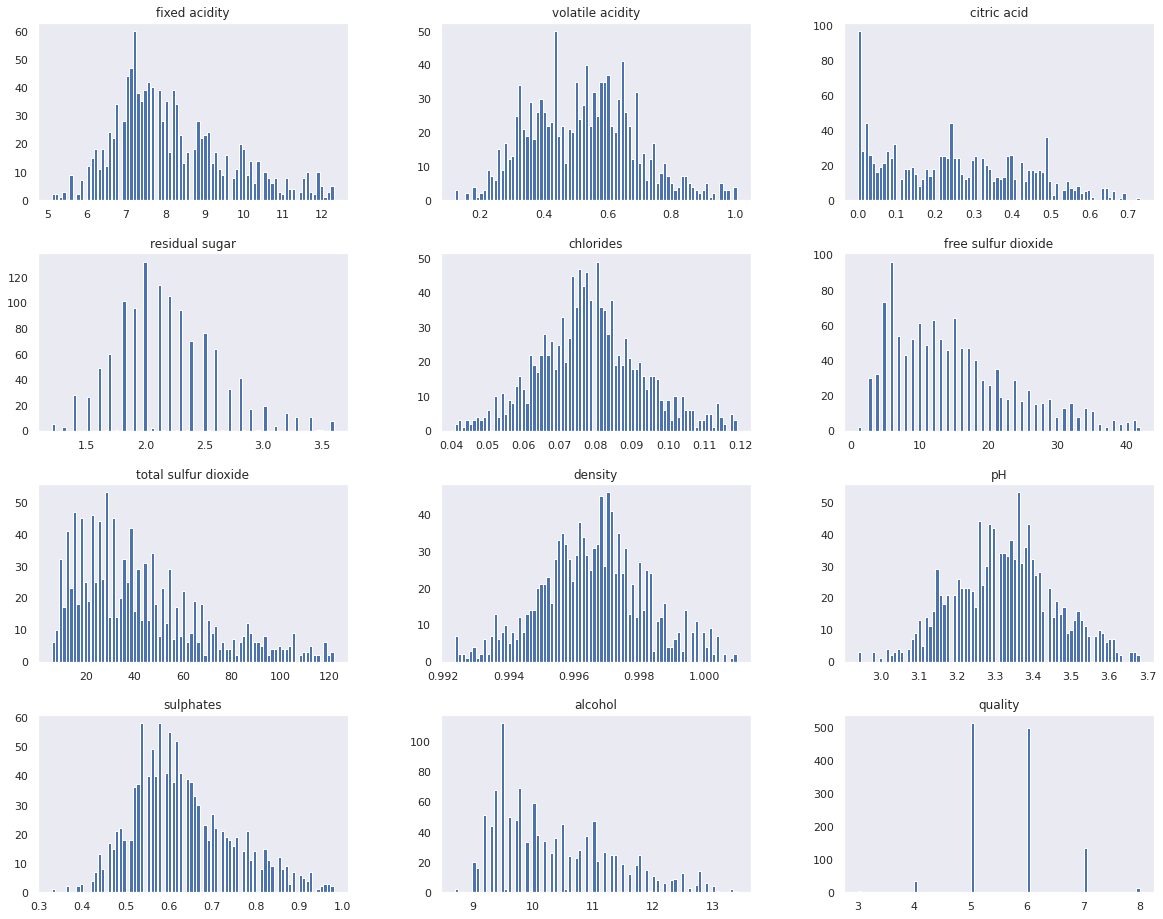

In [ ]:
r_wine_cleaned.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
#plt.savefig('inconditional_white.png')
plt.show()

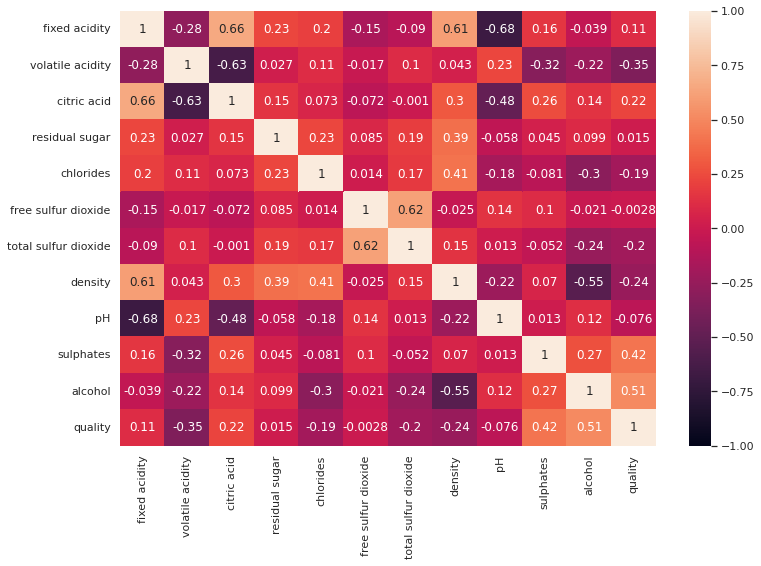

In [ ]:
# r_wine_cleaned.drop(columns=["free sulfur dioxide", "fixed acidity", "volatile acidity"], inplace = True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(r_wine_cleaned.corr(), annot=True, vmin=-1, vmax=1)

In [ ]:
r_wine_cleaned.skew()

fixed acidity           0.731072
volatile acidity        0.285773
citric acid             0.305563
residual sugar          0.619622
chlorides               0.225858
free sulfur dioxide     0.844992
total sulfur dioxide    0.981893
density                 0.047443
pH                      0.060418
sulphates               0.615406
alcohol                 0.775389
quality                 0.342786
dtype: float64

##Teste de remoção de skew com normalização logarítmica

In [ ]:
r_wine_skew = r_wine_cleaned

In [ ]:
for col in r_wine_skew.columns:
  if r_wine_skew[col].skew() >= 0.6:
    r_wine_skew[col] = np.log(r_wine_skew[col])

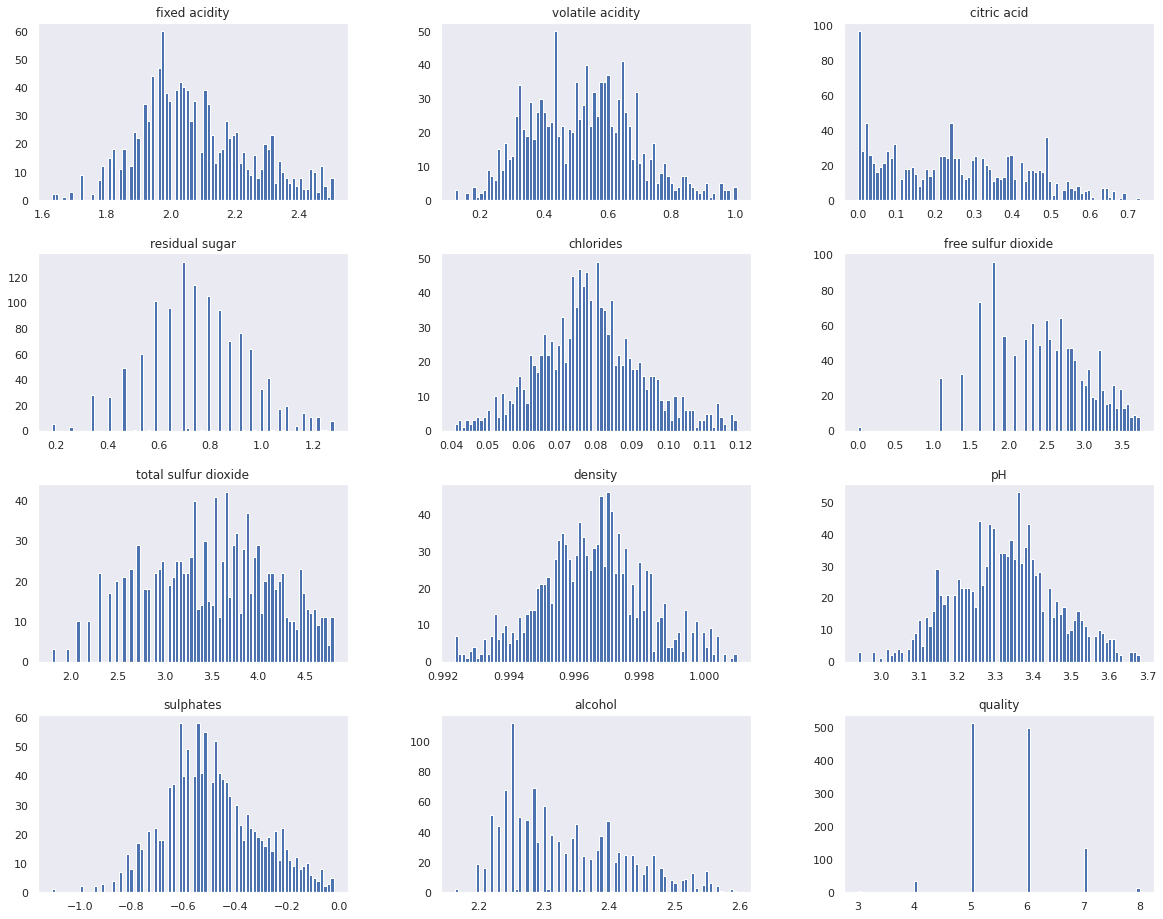

In [ ]:
r_wine_skew.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
#plt.savefig('inconditional_white.png')
plt.show()

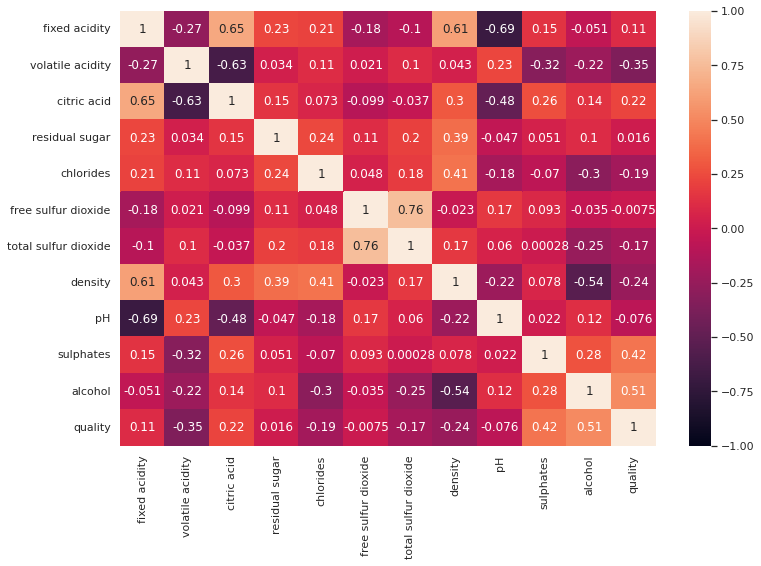

In [ ]:
# r_wine_cleaned.drop(columns=["free sulfur dioxide", "fixed acidity", "volatile acidity"], inplace = True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(r_wine_skew.corr(), annot=True, vmin=-1, vmax=1)

##Teste de remoção de skew com transformação Box-Cox

In [ ]:
r_wine_skew = r_wine_cleaned

In [ ]:
for col in r_wine_skew.columns:
  if r_wine_skew[col].skew() >= 0.6:
    r_wine_skew[col] = stats.boxcox(r_wine_skew[col])[0]

In [ ]:
r_wine_skew.skew()

fixed acidity           0.336470
volatile acidity        0.285773
citric acid             0.305563
residual sugar          0.036335
chlorides               0.225858
free sulfur dioxide    -0.335450
total sulfur dioxide   -0.207976
density                 0.047443
pH                      0.060418
sulphates               0.158811
alcohol                 0.106005
quality                 0.342786
dtype: float64

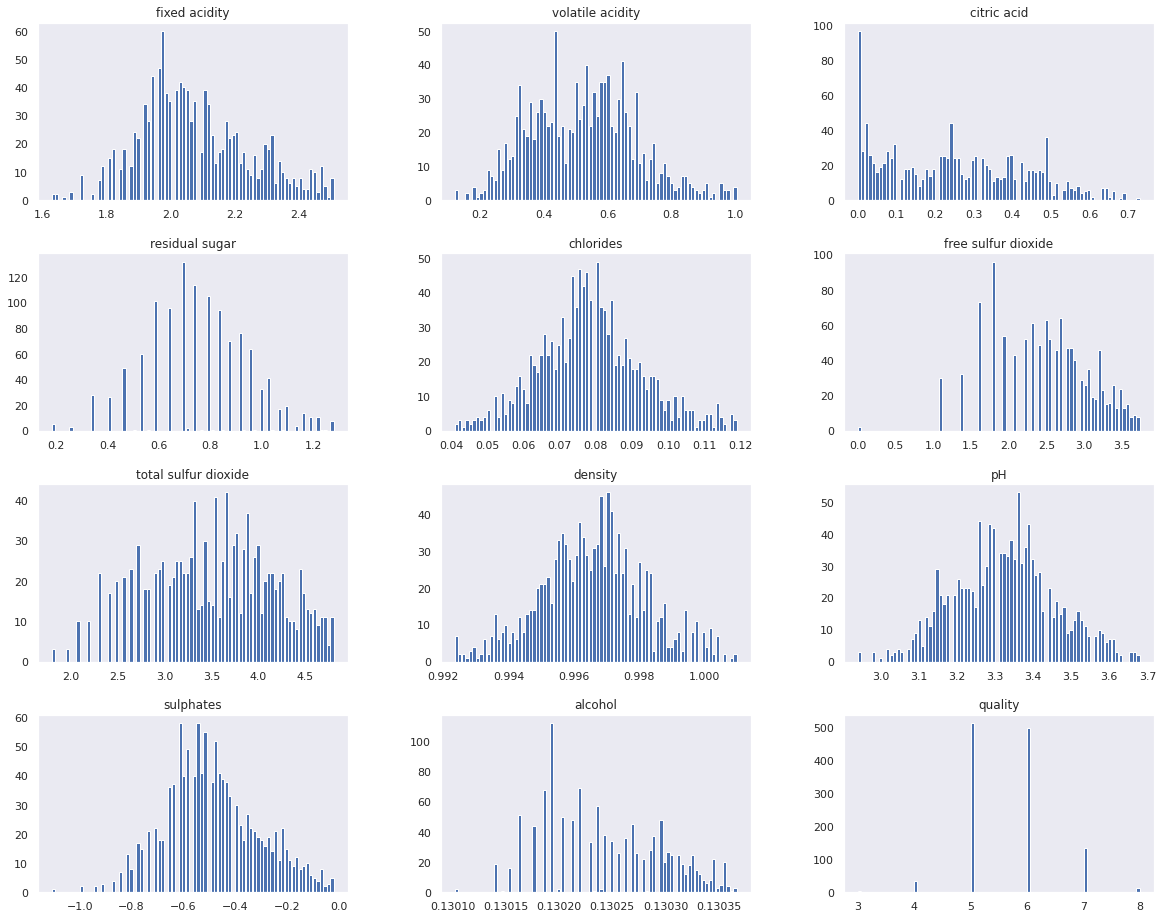

In [ ]:
r_wine_skew.hist(
    figsize=(20, 16),
    grid = False,
    rwidth = 0.9,
    bins = 80
)
#plt.savefig('inconditional_white.png')
plt.show()

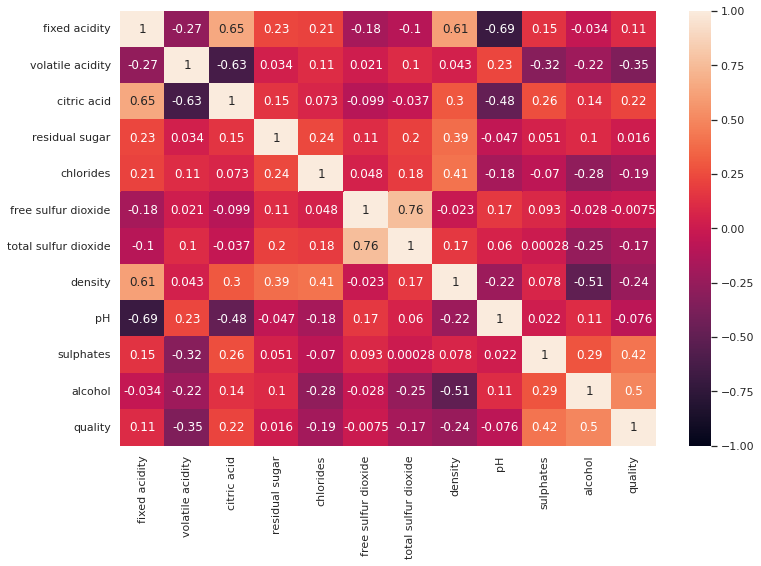

In [ ]:
# r_wine_cleaned.drop(columns=["free sulfur dioxide", "fixed acidity", "volatile acidity"], inplace = True)
sns.set(rc = {'figure.figsize':(12,8)})
sns.heatmap(r_wine_skew.corr(), annot=True, vmin=-1, vmax=1)

Observou-se que não houve nenhuma mudança significativa entre as correlações quando consideradas a transformação logarítimica, a transformação box-cox e nenhuma transformação. Logo, o tratamento da skew não se mostra necessário.

# 3 PCR
- Resource: http://www.science.smith.edu/~jcrouser/SDS293/labs/lab11-py.html
- nessa primeira parte eu tava testando o codigo do cara e acabei ja separando os dados. no dele ele separa so na frente, comisso acabei repetindo o processo de analise das pcs... em breve vou apagar o repetido

In [ ]:
df = pd.DataFrame.from_dict(w_wine_skew)
w_wine_train = df.copy(deep=False)
del w_wine_train['quality']
y = pd.concat([w_wine_skew['quality']], axis = 1)

x_treino, x_teste, y_treino, y_teste = skms.train_test_split(w_wine_train, y, test_size=0.25, random_state=0)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale 


pca = PCA()
X_reduced = pca.fit_transform(scale(x_treino))

In [ ]:
pd.DataFrame(pca.components_.T).loc[:4,:5]


,0,1,2,3,4,5
0,0.119612,-0.638859,-0.102214,-0.026886,0.203211,-0.117359
1,-0.010425,0.075654,0.559078,-0.403727,0.576190,0.299608
2,0.076197,-0.328564,-0.496571,-0.371821,-0.059592,0.634651
3,0.391322,0.005388,0.326858,-0.067630,-0.077646,0.044867
4,0.342128,0.028075,-0.079829,0.367577,0.181298,0.219654


In [ ]:
y_treino = y_treino.values.ravel()


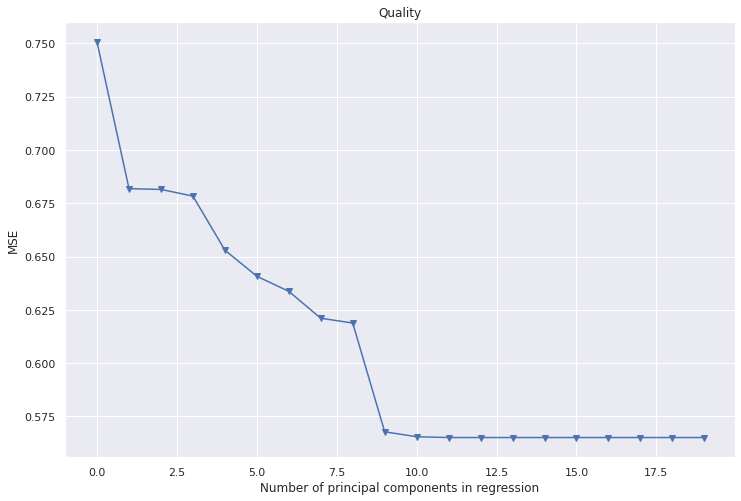

In [ ]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression


# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, 
                                           np.ones((n,1)), 
                                           y_treino.ravel(), 
                                           cv=kf_10, 
                                           scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr,
                                               X_reduced[:,:i],
                                               y_treino.ravel(), 
                                               cv=kf_10, 
                                               scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
# Plot results    
plt.plot(mse, '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 31.62,  44.94,  56.05,  65.86,  74.79,  81.76,  88.22,  93.63,
        97.16,  99.7 , 100.  ])

In [ ]:
pca2 = PCA()

# Split into training and test sets
X_train, X_test , y_train, y_test = model_selection.train_test_split(w_wine_train, y, test_size=0.5, random_state=1)


In [ ]:
y_train = y_train.values.ravel()

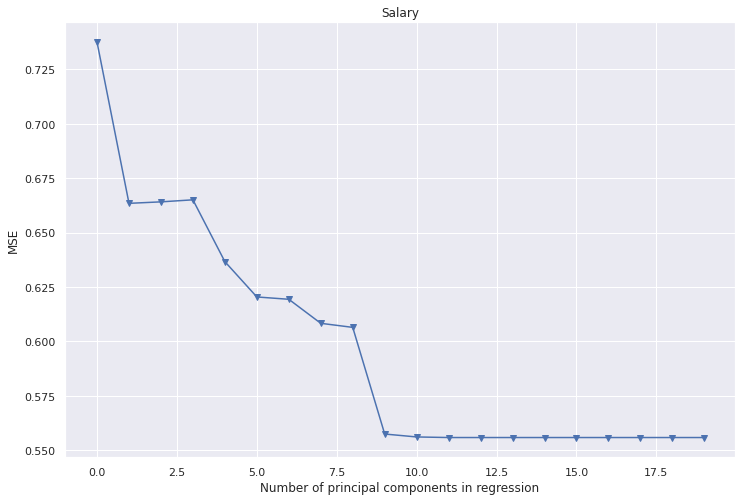

In [ ]:

# Scale the data
X_reduced_train = pca2.fit_transform(scale(X_train))
n = len(X_reduced_train)

# 10-fold CV, with shuffle
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

mse = []

# Calculate MSE with only the intercept (no principal components in regression)
score = -1*model_selection.cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()    
mse.append(score)

# Calculate MSE using CV for the 19 principle components, adding one component at the time.
for i in np.arange(1, 20):
    score = -1*model_selection.cross_val_score(regr, X_reduced_train[:,:i], y_train.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)

plt.plot(np.array(mse), '-v')
plt.xlabel('Number of principal components in regression')
plt.ylabel('MSE')
plt.title('Quality')
plt.xlim(xmin=-1);

In [ ]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 31.62,  44.94,  56.05,  65.86,  74.79,  81.76,  88.22,  93.63,
        97.16,  99.7 , 100.  ])

In [ ]:
from sklearn.metrics import mean_squared_error

X_reduced_test = pca2.transform(scale(X_test))[:,:10]

# Train regression model on training data 
regr = LinearRegression()
regr.fit(X_reduced_train[:,:10], y_train)

# Prediction with test data
pred = regr.predict(X_reduced_test)
mean_squared_error(y_test, pred)

0.5535887000630729